# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [39]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [40]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [41]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [42]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [43]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.drop(columns=['MEDV']) 
y = data['MEDV']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [45]:
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")

Training R-squared: 0.7509
Testing R-squared: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")

Training Mean Squared Error: 21.6414
Testing Mean Squared Error: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the results
print(f"Training Mean Absolute Error: {train_mae:.4f}")
print(f"Testing Mean Absolute Error: {test_mae:.4f}")

Training Mean Absolute Error: 3.3148
Testing Mean Absolute Error: 3.1891


## Classification Model Evaluation

In [48]:
from sklearn.datasets import load_iris
data = load_iris()

In [50]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [51]:
column_names = data.feature_names

In [52]:
df = pd.DataFrame(data['data'],columns=column_names)

In [53]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
target = pd.DataFrame(data.target)

In [55]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [57]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data['data'] 
y = data['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=200, random_state=42)

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Generate predictions for both training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [59]:
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Set Accuracy:", accuracy_score(y_test, y_test_pred))


Training Set Accuracy: 0.975
Testing Set Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [60]:
from sklearn.metrics import balanced_accuracy_score

train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

print(f"Training Set Balanced Accuracy: {train_balanced_accuracy:.4f}")
print(f"Testing Set Balanced Accuracy: {test_balanced_accuracy:.4f}")

Training Set Balanced Accuracy: 0.9756
Testing Set Balanced Accuracy: 1.0000


## 10. Calculate and print the precision score for both the training and the testing set.

In [61]:
from sklearn.metrics import precision_score


train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print(f"Training Set Precision Score: {train_precision:.4f}")
print(f"Testing Set Precision Score: {test_precision:.4f}")

Training Set Precision Score: 0.9768
Testing Set Precision Score: 1.0000


## 11. Calculate and print the recall score for both the training and the testing set.

In [62]:
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print the results
print(f"Training Set Recall Score: {train_recall:.4f}")
print(f"Testing Set Recall Score: {test_recall:.4f}")

Training Set Recall Score: 0.9750
Testing Set Recall Score: 1.0000


## 12. Calculate and print the F1 score for both the training and the testing set.

In [63]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print(f"Training Set F1 Score: {train_f1:.4f}")
print(f"Testing Set F1 Score: {test_f1:.4f}")


Training Set F1 Score: 0.9750
Testing Set F1 Score: 1.0000


## 13. Generate confusion matrices for both the training and the testing set.

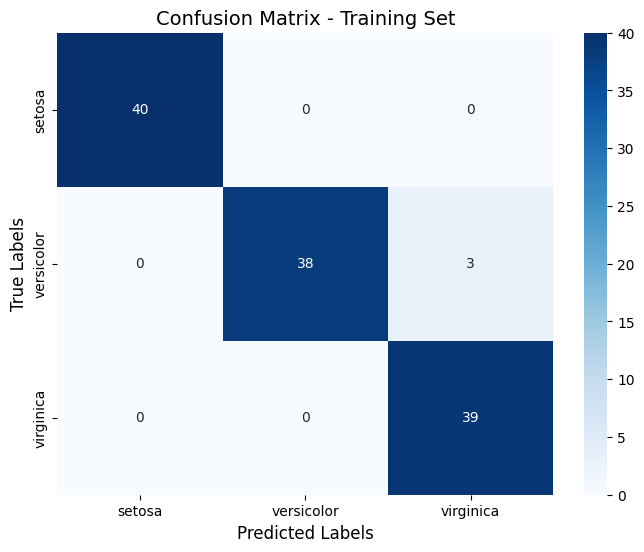

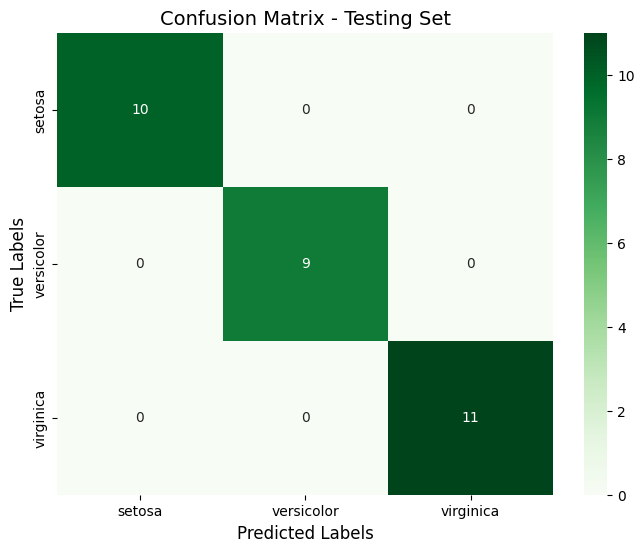

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title("Confusion Matrix - Training Set", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

# Plot confusion matrix for the testing set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Greens", xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title("Confusion Matrix - Testing Set", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Generate predictions for both training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_balanced_accuracy_rf = balanced_accuracy_score(y_train, y_train_pred_rf)
test_balanced_accuracy_rf = balanced_accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print results for comparison
print("Logistic Regression vs. Random Forest Evaluation Metrics")
print("-------------------------------------------------------")
print(f"Training Set Accuracy: Logistic Regression: {accuracy_score(y_train, y_train_pred):.4f}, Random Forest: {train_accuracy_rf:.4f}")
print(f"Testing Set Accuracy: Logistic Regression: {accuracy_score(y_test, y_test_pred):.4f}, Random Forest: {test_accuracy_rf:.4f}")
print(f"Training Set Balanced Accuracy: Logistic Regression: {balanced_accuracy_score(y_train, y_train_pred):.4f}, Random Forest: {train_balanced_accuracy_rf:.4f}")
print(f"Testing Set Balanced Accuracy: Logistic Regression: {balanced_accuracy_score(y_test, y_test_pred):.4f}, Random Forest: {test_balanced_accuracy_rf:.4f}")
print(f"Training Set F1 Score: Logistic Regression: {f1_score(y_train, y_train_pred, average='weighted'):.4f}, Random Forest: {train_f1_rf:.4f}")
print(f"Testing Set F1 Score: Logistic Regression: {f1_score(y_test, y_test_pred, average='weighted'):.4f}, Random Forest: {test_f1_rf:.4f}")


Logistic Regression vs. Random Forest Evaluation Metrics
-------------------------------------------------------
Training Set Accuracy: Logistic Regression: 0.9750, Random Forest: 1.0000
Testing Set Accuracy: Logistic Regression: 1.0000, Random Forest: 1.0000
Training Set Balanced Accuracy: Logistic Regression: 0.9756, Random Forest: 1.0000
Testing Set Balanced Accuracy: Logistic Regression: 1.0000, Random Forest: 1.0000
Training Set F1 Score: Logistic Regression: 0.9750, Random Forest: 1.0000
Testing Set F1 Score: Logistic Regression: 1.0000, Random Forest: 1.0000
